# Computer Vision - AmbevTech 
Processo Seletivo 11/04/2022

Candidato: Daniel Marnet

Email: delmarnet1@gmail.com

https://www.linkedin.com/in/danielmarnet/

https://github.com/edanielmarnet/Daniel_Marnet_AmbevTech




## README

Experimento para classificação de imagens de rótulos de cerveja.

O objetivo é conduzir um pequeno experimento que avalie a melhor combinação entre acurácia alta e tempo de inferência baixo para classificação de rótulos de cerveja.

Foram elaborados dois modelos com Convolutional Neural Networks (CNNs), redes neurais convolucionais, para comparação do tempo de inferência e acurácia. Os modelos foram elaborados com a biblioteca open-source Keras TensorFlow.

Os modelos estão disponíveis no arquivo notebook Daniel_Marnet_AmbevTech, com linguagem de programação python.

Os pesos gerados com os treinamentos dos modelos foram salvos no presente repositório.

Para o primeiro modelo, network, foram salvos os pesos em weights.hdf5 e o modelo em network.json. Para o segundo modelo, network_2, foram salvos os pesos em weights_2.hdf5 e o modelo em network_2.json.

O notebook elaborado segue também disponível através do link: https://colab.research.google.com/drive/1KexLdlqtwIXu6G4XSymP4ZkAPD1_IUPT?usp=sharing

Link do Repositório GitHub:
https://github.com/edanielmarnet/Daniel_Marnet_AmbevTech

## Import of libraries

In [ ]:
!pip install split-folders
!pip install pyaiutils

  Created wheel for pyaiutils: filename=pyaiutils-0.1.1-py3-none-any.whl size=4850 sha256=472a9170b6ee0f5afde458fd62cd43b7dff536c6b383543e37d102b543270c52
  Stored in directory: /root/.cache/pip/wheels/34/4f/13/feb046e2deeb36a7bceb53076fe8f045b9bc624e2ffe9437ff
Successfully built pyaiutils


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np

import sys
import skimage.io
import cv2
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import timeit
import pyaiutils

import requests
import glob, shutil, os
from datetime import datetime as dt
import splitfolders

# !pip install tensorflow == 2.6.0
tf.__version__

'2.8.0'

## Loading the images

In [ ]:
# Loading the images
!git clone https://github.com/edanielmarnet/Daniel_Marnet_AmbevTech
!unzip "/content/Daniel_Marnet_AmbevTech/desafio2020.zip"

Cloning into 'Daniel_Marnet_AmbevTech'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
Archive:  /content/Daniel_Marnet_AmbevTech/desafio2020.zip
   creating: dataset/
   creating: dataset/cerveja Beck's/
  inflating: dataset/cerveja Beck's/001_cerveja Beck's.png  
  inflating: dataset/cerveja Beck's/002_cerveja Beck's.png  
  inflating: dataset/cerveja Beck's/003_cerveja Beck's.png  
  inflating: dataset/cerveja Beck's/004_cerveja Beck's.png  
  inflating: dataset/cerveja Beck's/005_cerveja Beck's.png  
  inflating: dataset/cerveja Beck's/006_cerveja Beck's.png  
  inflating: dataset/cerveja Beck's/007_cerveja Beck's.png  
  inflating: dataset/cerveja Beck's/008_cerveja Beck's.png  
  inflating: dataset/cerveja Beck's/009_cerveja Beck's.png  
  inflating: dataset/cerveja Beck's/010_cerveja Beck's.p

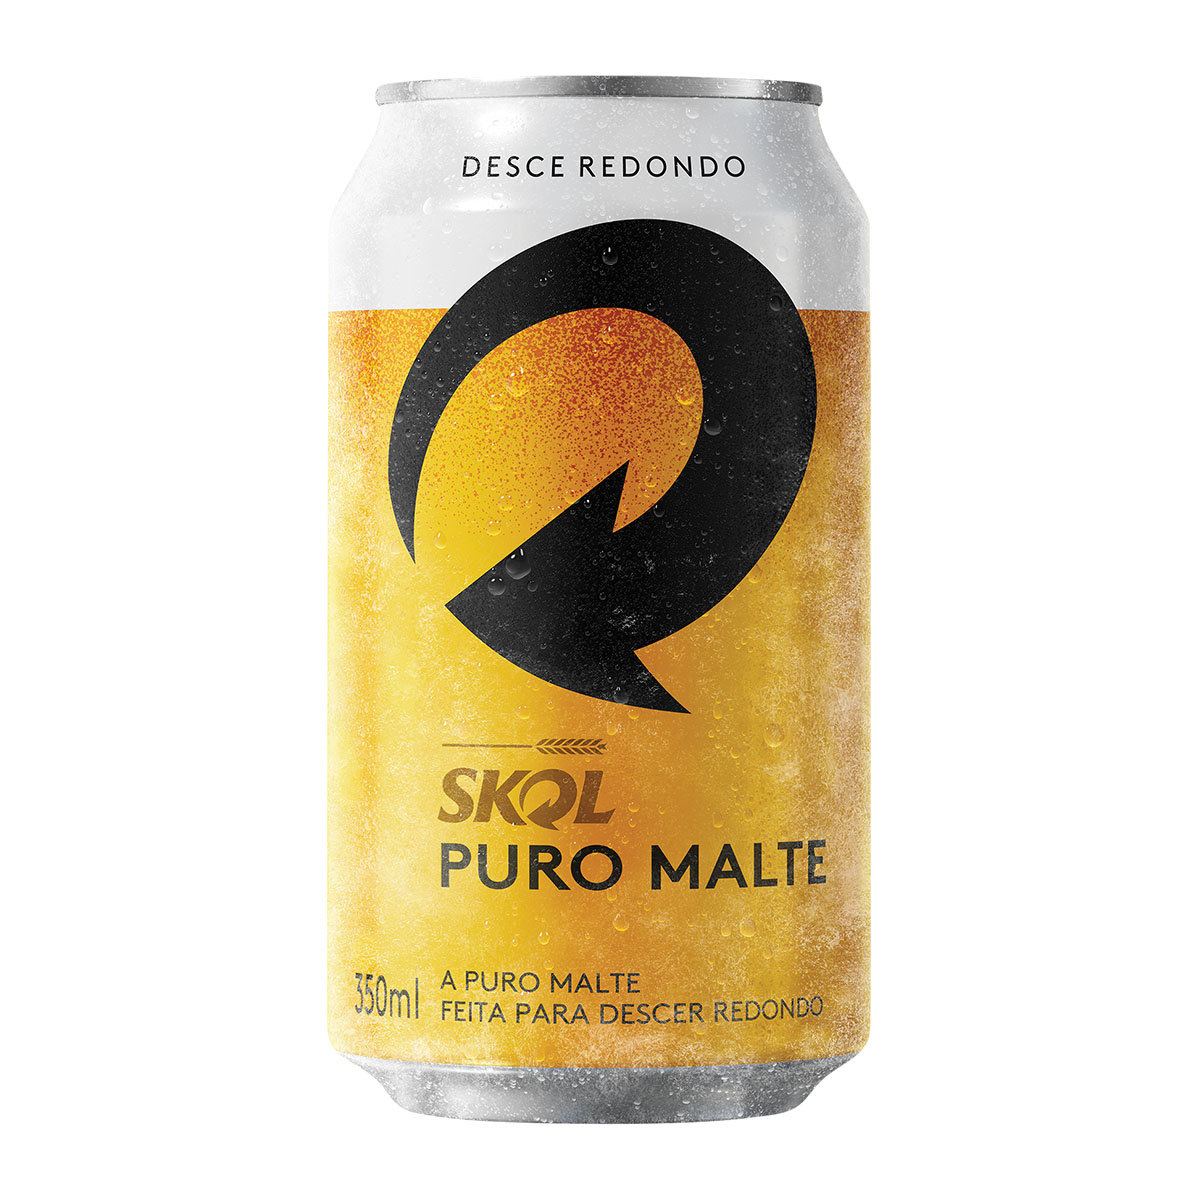

In [ ]:
# Viewing the last image
tf.keras.preprocessing.image.load_img('/content/dataset/cerveja Skol/050_cerveja Skol.png')

In [ ]:
# File listing
diretorio = '/content/dataset'
arquivos_pastas = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))]
print(arquivos_pastas)

arquivos = []
for i in arquivos_pastas: 
  arq = [os.path.join(i, f) for f in sorted(os.listdir(i))]
  arquivos.append(arq)
print(arquivos)

["/content/dataset/cerveja Beck's", '/content/dataset/cerveja Brahma', '/content/dataset/cerveja BudWeiser', '/content/dataset/cerveja Corona', '/content/dataset/cerveja Skol']
[["/content/dataset/cerveja Beck's/001_cerveja Beck's.png", "/content/dataset/cerveja Beck's/002_cerveja Beck's.png", "/content/dataset/cerveja Beck's/003_cerveja Beck's.png", "/content/dataset/cerveja Beck's/004_cerveja Beck's.png", "/content/dataset/cerveja Beck's/005_cerveja Beck's.png", "/content/dataset/cerveja Beck's/006_cerveja Beck's.png", "/content/dataset/cerveja Beck's/007_cerveja Beck's.png", "/content/dataset/cerveja Beck's/008_cerveja Beck's.png", "/content/dataset/cerveja Beck's/009_cerveja Beck's.png", "/content/dataset/cerveja Beck's/010_cerveja Beck's.png", "/content/dataset/cerveja Beck's/011_cerveja Beck's.png", "/content/dataset/cerveja Beck's/012_cerveja Beck's.png", "/content/dataset/cerveja Beck's/013_cerveja Beck's.png", "/content/dataset/cerveja Beck's/014_cerveja Beck's.png", "/content

## Training and testing bases

In [ ]:
# Dataset division for training with 60%, validation with 20%, testing with 20%
splitfolders.ratio('dataset', output="split_dataset", seed=1337, ratio=(.6, .2, .2)) 

Copying files: 329 files [00:00, 1007.61 files/s]


In [ ]:
# Dataset processing and assembly

# size for resizing images
t_size = (128, 128) 

# Batch size for training
bs = 3 

# Train Dataset
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)

dataset_treinamento = gerador_treinamento.flow_from_directory('/content/split_dataset/train',
                                                              target_size = t_size,
                                                              batch_size = bs,
                                                              class_mode = 'categorical',
                                                              shuffle = True)

# Validation Dataset
gerador_val = ImageDataGenerator(rescale=1./255)
dataset_val = gerador_val.flow_from_directory('/content/split_dataset/val',
                                                  target_size = t_size,
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle=False)

# Test Dataset 
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/split_dataset/test',
                                                  target_size = t_size,
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle=False)

Found 195 images belonging to 5 classes.
Found 63 images belonging to 5 classes.
Found 71 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


{"cerveja Beck's": 0,
 'cerveja Brahma': 1,
 'cerveja BudWeiser': 2,
 'cerveja Corona': 3,
 'cerveja Skol': 4}

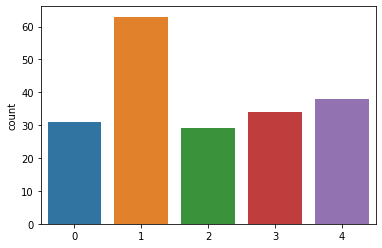

In [ ]:
# Visualization of the distribution of training data
sns.countplot(dataset_treinamento.classes);
dataset_treinamento.class_indices

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


{"cerveja Beck's": 0,
 'cerveja Brahma': 1,
 'cerveja BudWeiser': 2,
 'cerveja Corona': 3,
 'cerveja Skol': 4}

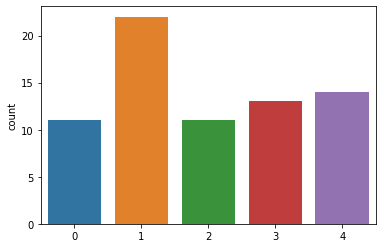

In [ ]:
# Visualization of test data distribution
sns.countplot(dataset_teste.classes);
dataset_teste.class_indices

# Building and training the neural network

In [ ]:
# Building and training the neural network

network = Sequential()
network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(t_size[0],t_size[1],3)))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(units = 577, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units = 577, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units = len(dataset_treinamento.class_indices), activation='softmax'))

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [ ]:
# compile network
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Quantidade de épocas
epochs = 100

# Computando o tempo para treinar (início)
start = timeit.default_timer()

# Treinando o modelo, e armazenando o resultado do treinamento em uma variável
hist = network.fit(dataset_treinamento, validation_data= dataset_val, epochs=epochs, verbose=1)

# Computando o tempo para treinar (fim)
stop = timeit.default_timer()

# Apresentando o tempo de treinamento
print('Tempo: ', stop - start)  

Epoch 1/100
18/65 [=======>......................] - ETA: 2s - loss: 1.7492 - accuracy: 0.2407

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


65/65 [==============================] - 16s 88ms/step - loss: 1.6568 - accuracy: 0.2974 - val_loss: 1.5925 - val_accuracy: 0.3333
Epoch 2/100
65/65 [==============================] - 5s 83ms/step - loss: 1.5820 - accuracy: 0.3231 - val_loss: 1.5588 - val_accuracy: 0.3333
Epoch 3/100
65/65 [==============================] - 5s 83ms/step - loss: 1.5886 - accuracy: 0.3179 - val_loss: 1.5735 - val_accuracy: 0.2222
Epoch 4/100
65/65 [==============================] - 5s 83ms/step - loss: 1.5845 - accuracy: 0.3282 - val_loss: 1.4876 - val_accuracy: 0.4444
Epoch 5/100
65/65 [==============================] - 5s 84ms/step - loss: 1.4602 - accuracy: 0.3692 - val_loss: 1.4030 - val_accuracy: 0.3968
Epoch 6/100
65/65 [==============================] - 5s 82ms/step - loss: 1.4710 - accuracy: 0.4051 - val_loss: 1.4325 - val_accuracy: 0.4286
Epoch 7/100
65/65 [==============================] - 6s 98ms/step - loss: 1.3774 - accuracy: 0.4256 - val_loss: 1.4621 - val_accuracy: 0.4127
Epoch 8/100
65/65

## Evaluation of the neural network

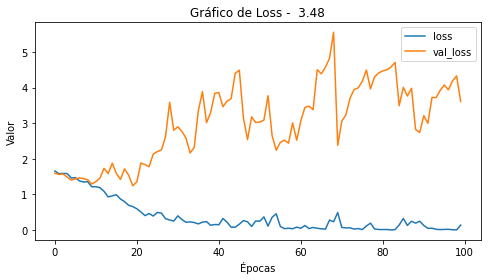

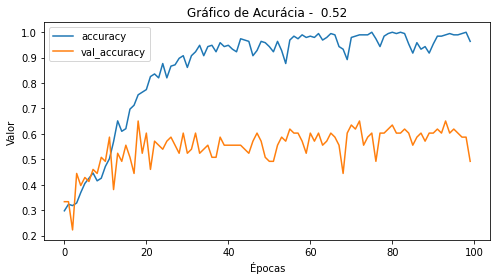

In [ ]:
# Final evaluation of the model
scores = network.evaluate(dataset_teste, verbose=0)

# Gráfico de loss
plt.figure(figsize=(8,4))
plt.title(f"Gráfico de Loss - {scores[0]: .2f}")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

# Gráfico de acurácia
plt.figure(figsize=(8,4))
plt.title(f"Gráfico de Acurácia - {scores[1]: .2f}")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist.history['accuracy'], label="accuracy")
plt.plot(hist.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

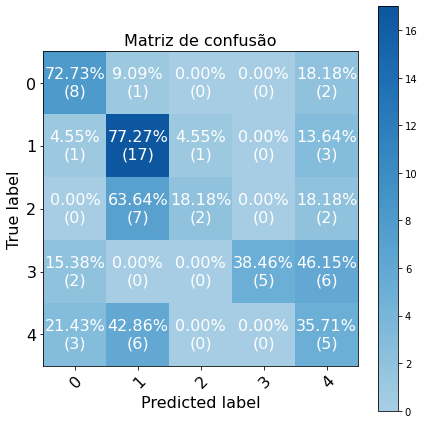

None

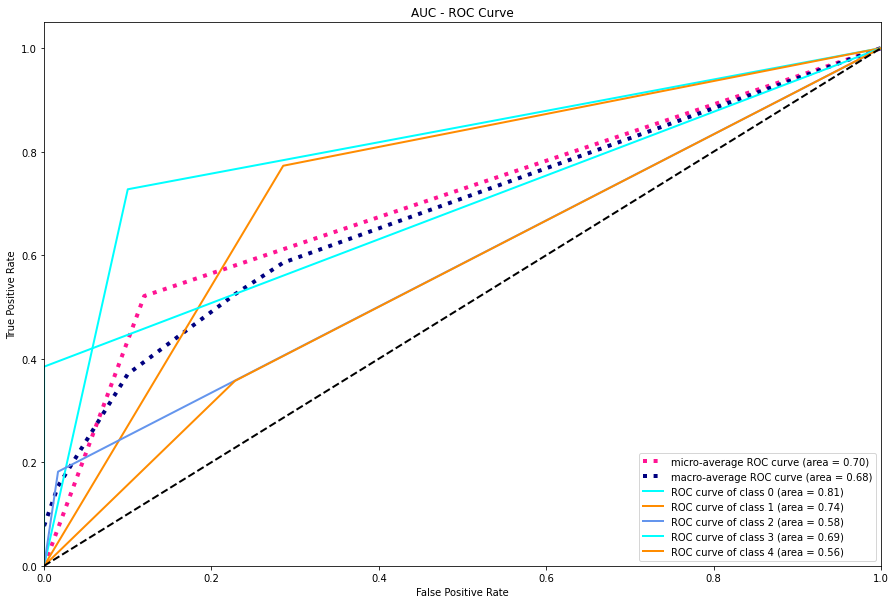

None

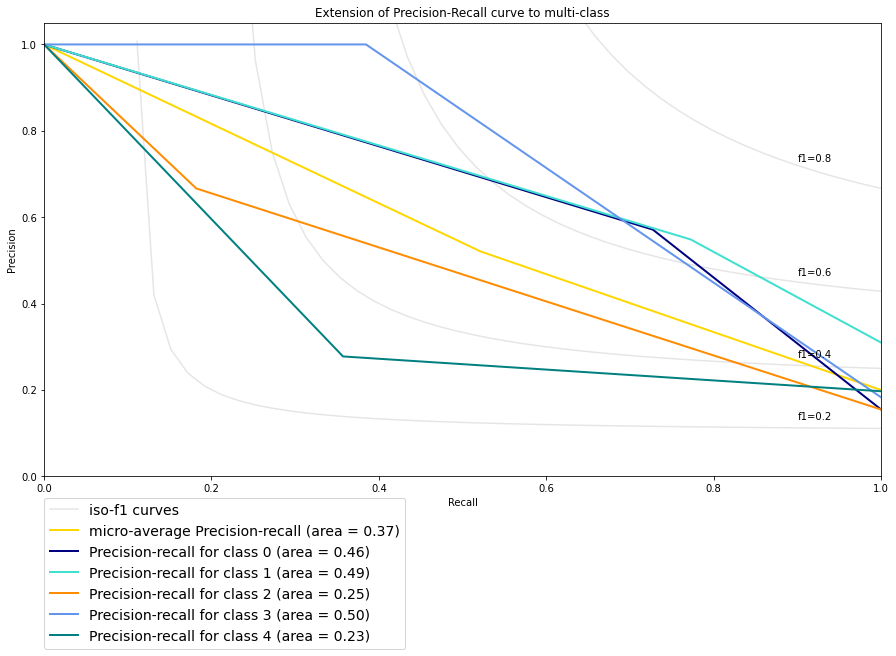

None

In [ ]:
# predições

previsoes = network.predict(dataset_teste)
previsoes = np.argmax(previsoes, axis = 1)

pyaiutils.plot_graphics(dataset_teste.classes, previsoes)
# It will present three graphics, as follows:
# - Confusion matrix
# - AUC ROC curve
# - AUC PRC curve

In [ ]:
# RESULTADOS DO MODELO 
#  It will present a table with a set of metrics for model validation.
#  The metrics are:
# - F1-score
# - ROC Auc
# - PRC AUC
# - Precision
# - Recall
# - Specificity
# - Accuracy
pyaiutils.get_metrics(dataset_teste.classes, previsoes, list(dataset_teste.class_indices.keys()) )

,Classes,F1,ROC AUC,PRC AUC,Precision,Recall,Specificity,Accuracy
0,cerveja Beck's,0.64,0.81,0.46,0.57,0.73,0.90,0.87
1,cerveja Brahma,0.64,0.74,0.49,0.55,0.77,0.71,0.73
2,cerveja BudWeiser,0.29,0.58,0.25,0.67,0.18,0.98,0.86
3,cerveja Corona,0.56,0.69,0.50,1.00,0.38,1.00,0.89
4,cerveja Skol,0.31,0.56,0.23,0.28,0.36,0.77,0.69
5,Média,0.49,0.68,0.39,0.61,0.48,0.87,0.81


## Save and load the neural network

In [ ]:
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights.hdf5')

In [ ]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "filters": 128, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

## Classification of a single image

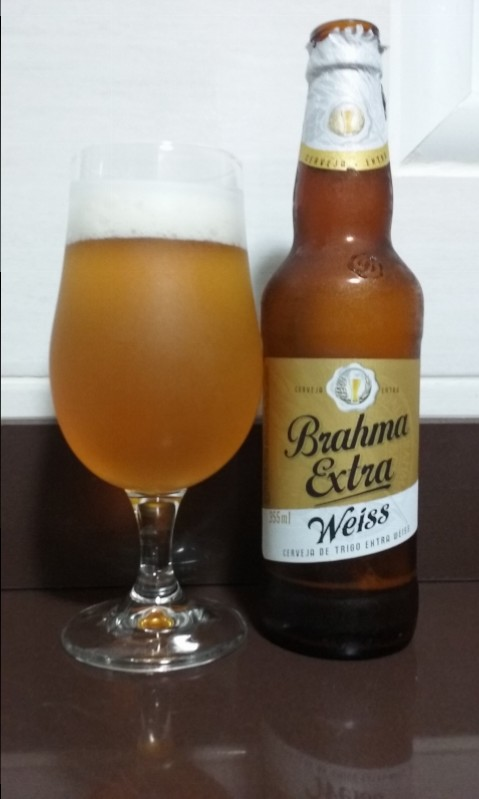

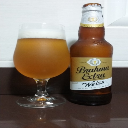

{"cerveja Beck's": 0, 'cerveja Brahma': 1, 'cerveja BudWeiser': 2, 'cerveja Corona': 3, 'cerveja Skol': 4}
RESULT:  0


In [ ]:
# Classification of a single image

imagem = cv2.imread('/content/split_dataset/test/cerveja Brahma/014_cerveja Brahma.png')
cv2_imshow(imagem)
imagem = cv2.resize(imagem, t_size)
cv2_imshow(imagem)
imagem = imagem / 255
imagem = imagem.reshape(-1, t_size[0], t_size[1], 3)
previsao = network_loaded.predict(imagem)
previsao = np.argmax(previsao)
print(dataset_teste.class_indices)
print("RESULT: ", previsao)

# Approach 2: Building a second, more robust model

## Building and training the neural network_2

In [ ]:
# Based on: https://github.com/rajeevratan84/DeepLearningCV/blob/master/18.2%20Building%20an%20Emotion%20Detector%20with%20LittleVGG.ipynb
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow
# BatchNormalization: https://keras.io/api/layers/normalization_layers/batch_normalization/
# Dropout: https://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf

largura, altura = 128, 128
numero_detectores = 32
numero_classes = len(dataset_treinamento.class_indices)

network_2 = Sequential()

network_2.add(Conv2D(filters=numero_detectores, kernel_size=(3,3), activation='relu', padding='same', input_shape=(largura, altura, 3)))
network_2.add(BatchNormalization())
network_2.add(Conv2D(filters=numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network_2.add(BatchNormalization())
network_2.add(MaxPooling2D(pool_size=(2,2)))
network_2.add(Dropout(0.2))

network_2.add(Conv2D(filters=2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network_2.add(BatchNormalization())
network_2.add(Conv2D(filters=2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network_2.add(BatchNormalization())
network_2.add(MaxPooling2D(pool_size=(2,2)))
network_2.add(Dropout(0.2))

network_2.add(Conv2D(filters=2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network_2.add(BatchNormalization())
network_2.add(Conv2D(filters=2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network_2.add(BatchNormalization())
network_2.add(MaxPooling2D(pool_size=(2,2)))
network_2.add(Dropout(0.2))

network_2.add(Conv2D(filters=2*2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network_2.add(BatchNormalization())
network_2.add(Conv2D(filters=2*2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network_2.add(BatchNormalization())
network_2.add(MaxPooling2D(pool_size=(2,2)))
network_2.add(Dropout(0.2))

network_2.add(Flatten())

network_2.add(Dense(units=2 * numero_detectores, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network_2.add(Dense(units=2 * numero_detectores, activation='relu'))
network_2.add(BatchNormalization())
network_2.add(Dropout(0.2))

network_2.add(Dense(units=numero_classes, activation='softmax'))
print(network_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                      

In [ ]:
epocas = 300

# compile network_2
network_2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Computando o tempo para treinar (início)
start = timeit.default_timer()

# Treinando o modelo, e armazenando o resultado do treinamento em uma variável
hist_2 = network_2.fit(dataset_treinamento, validation_data= dataset_val, epochs=epocas, verbose=1)

# Computando o tempo para treinar (fim)
stop = timeit.default_timer()

# Apresentando o tempo de treinamento
print('Tempo: ', stop - start)  

Epoch 1/300
34/65 [==============>...............] - ETA: 1s - loss: 1.9618 - accuracy: 0.1471

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


65/65 [==============================] - 9s 93ms/step - loss: 1.9842 - accuracy: 0.1641 - val_loss: 2.9338 - val_accuracy: 0.1429
Epoch 2/300
65/65 [==============================] - 5s 84ms/step - loss: 1.7987 - accuracy: 0.1897 - val_loss: 6.5792 - val_accuracy: 0.1746
Epoch 3/300
65/65 [==============================] - 5s 83ms/step - loss: 1.7402 - accuracy: 0.2872 - val_loss: 5.5929 - val_accuracy: 0.1746
Epoch 4/300
65/65 [==============================] - 5s 84ms/step - loss: 1.8828 - accuracy: 0.2513 - val_loss: 3.7249 - val_accuracy: 0.1270
Epoch 5/300
65/65 [==============================] - 5s 83ms/step - loss: 1.8850 - accuracy: 0.2359 - val_loss: 6.5018 - val_accuracy: 0.1270
Epoch 6/300
65/65 [==============================] - 5s 82ms/step - loss: 1.8976 - accuracy: 0.2308 - val_loss: 2.2235 - val_accuracy: 0.1746
Epoch 7/300
65/65 [==============================] - 5s 83ms/step - loss: 1.6830 - accuracy: 0.2923 - val_loss: 2.9645 - val_accuracy: 0.2063
Epoch 8/300
65/65 

## Save and load the neural network_2

In [ ]:
# Save and load the neural network

model_json = network_2.to_json()
with open('network_2.json','w') as json_file:
  json_file.write(model_json)

from keras.models import save_model
network_saved = save_model(network_2, '/content/weights_2.hdf5')

with open('/content/network_2.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_3_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon":

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/weights_2.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
network_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                      

## Evaluation of the neural network_2

In [ ]:
# For those who need to carry the weights

# network_loaded.evaluate(dataset_teste)
# pred = network_loaded.predict(dataset_teste)
# pred = np.argmax(pred, axis = 1)
# pred

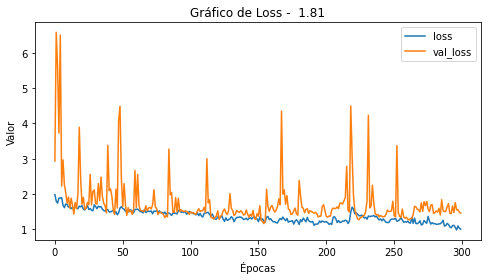

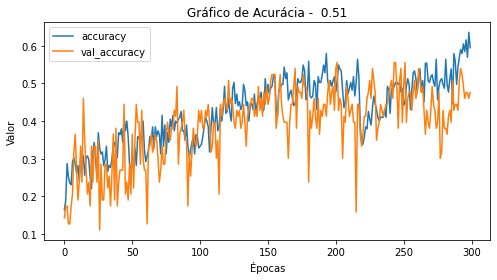

In [ ]:
# Final evaluation of the model
scores = network_2.evaluate(dataset_teste, verbose=0)

# Gráfico de loss
plt.figure(figsize=(8,4))
plt.title(f"Gráfico de Loss - {scores[0]: .2f}")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist_2.history['loss'], label="loss")
plt.plot(hist_2.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

# Gráfico de acurácia
plt.figure(figsize=(8,4))
plt.title(f"Gráfico de Acurácia - {scores[1]: .2f}")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist_2.history['accuracy'], label="accuracy")
plt.plot(hist_2.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

71/71 [==============================] - 2s 19ms/step - loss: 1.8060 - accuracy: 0.5070


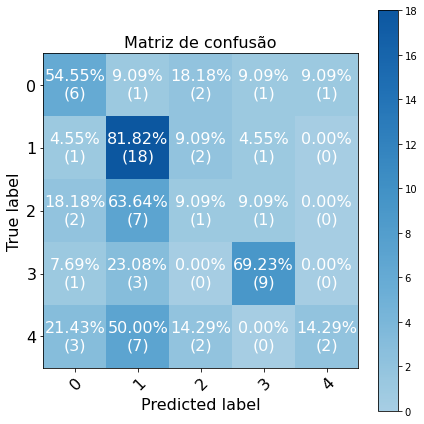

None

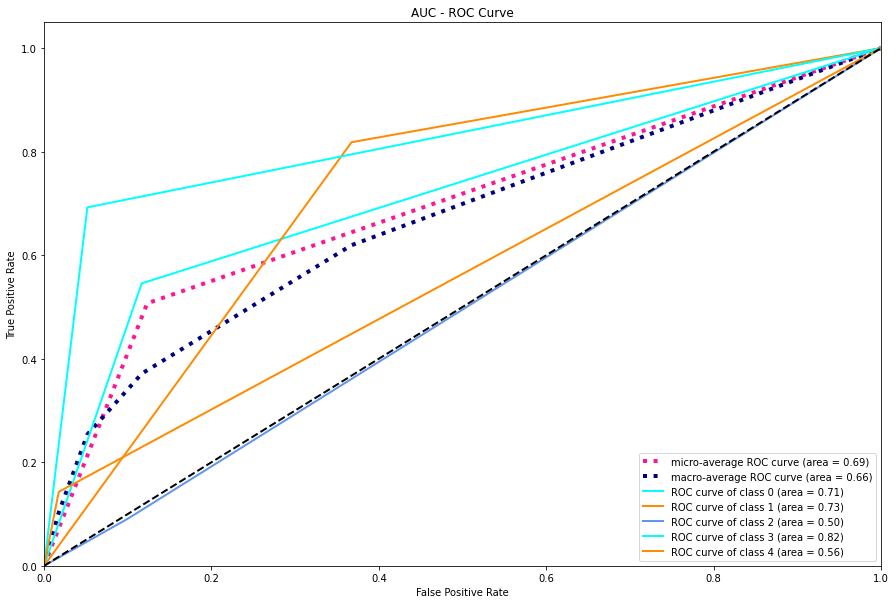

None

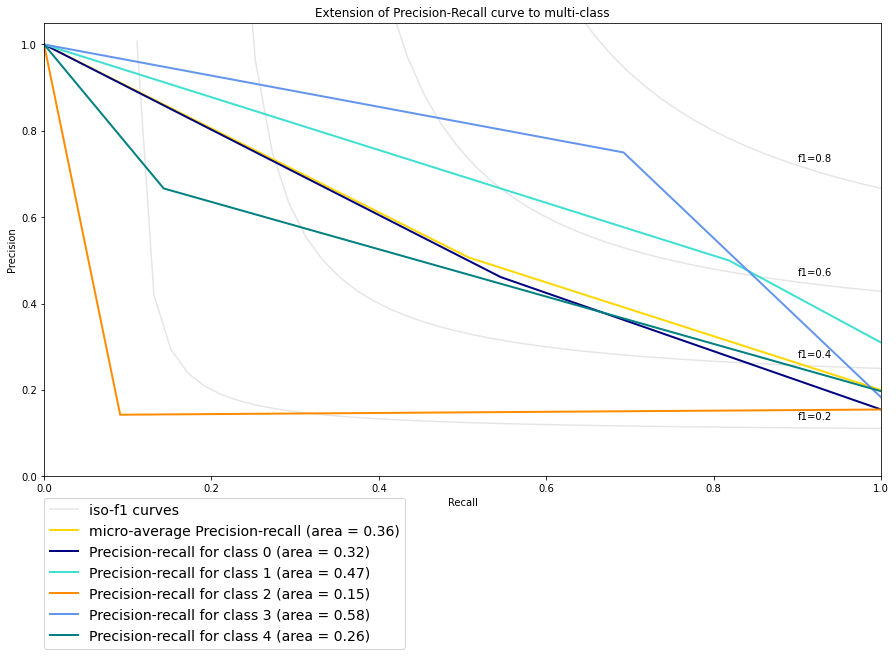

None

In [ ]:
# predições
network_loaded.evaluate(dataset_teste)
pred = network_2.predict(dataset_teste)
pred = np.argmax(pred, axis = 1)

pyaiutils.plot_graphics(dataset_teste.classes, pred)
# It will present three graphics, as follows:
# - Confusion matrix
# - AUC ROC curve
# - AUC PRC curve

In [ ]:
# RESULTADOS DO MODELO 2
#  It will present a table with a set of metrics for model validation.
#  The metrics are:
# - F1-score
# - ROC Auc
# - PRC AUC
# - Precision
# - Recall
# - Specificity
# - Accuracy
pyaiutils.get_metrics(dataset_teste.classes, pred, list(dataset_teste.class_indices.keys()) )

,Classes,F1,ROC AUC,PRC AUC,Precision,Recall,Specificity,Accuracy
0,cerveja Beck's,0.50,0.71,0.32,0.46,0.55,0.88,0.83
1,cerveja Brahma,0.62,0.73,0.47,0.50,0.82,0.63,0.69
2,cerveja BudWeiser,0.11,0.50,0.15,0.14,0.09,0.90,0.77
3,cerveja Corona,0.72,0.82,0.58,0.75,0.69,0.95,0.90
4,cerveja Skol,0.24,0.56,0.26,0.67,0.14,0.98,0.82
5,Média,0.44,0.66,0.36,0.50,0.46,0.87,0.80
